# Visualization of results for the Basque case study

In [627]:
import matplotlib.pyplot as plt  
import yaml
import numpy as np
import os
import sys
import pandas as pd
import geopandas as gpd

In [628]:
case_study_name = "region_dep_costs"
input_file_name = "transport_data_years_v50.yaml"

current_path = os.getcwd()
print("Current path:", current_path)
file_results = os.path.normpath(current_path + "/results")
print("File results:", os.path.normpath(file_results))
file_path = os.path.join(current_path, "/results")
print(file_path)
# Normalize the path
normalized_path = os.path.normpath(file_path)
print("Normalized path:", normalized_path)

Current path: c:\Users\Antonia\Documents\Github\iDesignRES2.0\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Users\Antonia\Documents\Github\iDesignRES2.0\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results


In [629]:
checked_path = os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_dict.yaml")
if os.path.exists(checked_path):
    print(f"The path {checked_path} exists.")
else:
    print(f"The path {checked_path} does not exist.")

The path c:\Users\Antonia\Documents\Github\iDesignRES2.0\iDesignRES_transcompmodel\examples\Basque country\results\region_dep_costs_budget_penalty_plus_dict.yaml exists.


## Reading input data

In [630]:
folder_input = os.path.normpath(current_path + "/data")
with open(folder_input + "/" + input_file_name) as file:
    input_data = yaml.safe_load(file)

## Reading output data

In [631]:
with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_dict.yaml")) as file:
    budget_penalty_minus_dict = yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_dict.yaml")) as file:
    budget_penalty_plus_dict= yaml.safe_load(file)

# with open(os.path.normpath(file_results + "/" + case_study_name + "_detour_time_dict.yaml")) as file:
#     detour_time_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_f_dict.yaml")) as file:
    f_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_dict.yaml")) as file:
    h_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_exist_dict.yaml")) as file:
    h_exist_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_minus_dict.yaml")) as file:
    h_minus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_plus_dict.yaml")) as file:
    h_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_q_fuel_infr_plus_dict.yaml")) as file:
    q_fuel_infr_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_q_mode_infr_plus_dict.yaml")) as file:
    q_mode_infr_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_s.yaml")) as file:
    s_dict= yaml.safe_load(file)


In [632]:
def process_key(key):
    # Convert string key to a tuple
    return safe_tuple_parser(key)

def process_value(value):
    # Convert string value to float
    return float(value)

def safe_tuple_parser(key):
    """
    Safely parses string representations of nested tuples into actual Python tuples.
    Example: "(2024, (1, 7, 0), (1, 8), 2024)" -> (2024, (1, 7, 0), (1, 8), 2024)
    """
    import ast  # Abstract Syntax Tree module for safe literal evaluation

    # Remove outer quotes if present and use `ast.literal_eval`
    try:
        return ast.literal_eval(key)
    except (SyntaxError, ValueError) as e:
        raise ValueError(f"Failed to parse key: {key}") from e



budget_penalty_minus = {process_key(key): process_value(value) for key, value in budget_penalty_minus_dict.items()}
budget_penalty_plus = {process_key(key): process_value(value) for key, value in budget_penalty_plus_dict.items()}
detour_time = {process_key(key): process_value(value) for key, value in detour_time_dict.items()}
f = {process_key(key): process_value(value) for key, value in f_dict.items()}
h = {process_key(key): process_value(value) for key, value in h_dict.items()}
h_exist = {process_key(key): process_value(value) for key, value in h_exist_dict.items()}
h_minus = {process_key(key): process_value(value) for key, value in h_minus_dict.items()}
h_plus = {process_key(key): process_value(value) for key, value in h_plus_dict.items()}
q_fuel_infr_plus = {process_key(key): process_value(value) for key, value in q_fuel_infr_plus_dict.items()}
q_mode_infr_plus = {process_key(key): process_value(value) for key, value in q_mode_infr_plus_dict.items()}
s = {process_key(key): process_value(value) for key, value in s_dict.items()}


## Visualizations

- cummulative shift (vehicle stock after different types and technologies) (check!)
- shift by income class (check!)
- mode shift (check!)
- infrastructure expansion by year for each technology (check!)
- *impact of route length*

In [633]:
print(input_data.keys())
model_parameters = input_data["Model"]
print(model_parameters)

Y = model_parameters["Y"]
y_init = model_parameters["y_init"]
pre_y = model_parameters["pre_y"]

G = pre_y + Y
g_init = y_init - pre_y
Y_end = y_init + Y - 1


dict_keys(['DetourReductionFactor', 'Edge', 'FinancialStatus', 'Fuel', 'GeographicElement', 'InitDetourTime', 'InitialFuelingInfr', 'InitialModeInfr', 'InitialVehicleStock', 'Initial_Mode_Share', 'Mode', 'Model', 'Node', 'Odpair', 'Path', 'Product', 'Regiontype', 'Speed', 'TechVehicle', 'Technology', 'Vehicletype'])
{'E': 12, 'N': 2, 'Y': 31, 'budget_penalty_minus': 100000, 'budget_penalty_plus': 100000, 'gamma': 0.001, 'goals_no_new_ICEV': {2035: 0.0}, 'goals_tot_BEV': {2030: 230.0}, 'pre_y': 25, 'y_init': 2020}


In [634]:
# print(input_data.keys())
fuel_list = input_data["Fuel"]
mode_list = input_data["Mode"]
techvehicle_list = input_data["TechVehicle"]
odpair_list = input_data["Odpair"]  
financial_status_list = input_data["FinancialStatus"]

od_pair_list_by_year = {}
for y in range(y_init, Y_end + 1):

    od_pair_list_by_year[y] = sum(odpair_list[r]["F"][y - y_init] for r in range(0, 20))


fuel_list = {item["id"]: item for item in fuel_list}
mode_list = {item["id"]: item for item in mode_list}
techvehicle_list = {item["id"]: item for item in techvehicle_list}
odpair_list = {item["id"]: item for item in odpair_list}
financial_status_list = {item["id"]: item for item in financial_status_list}

# calculating for each technology and each year the total cost
def get_vehicle_stock(by_income_class = False, income_class=None):
    techveh_stock = {}

    for tv_id in techvehicle_list:

        for y in range(y_init, Y_end + 1):
            if not by_income_class:
                total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in range(0, 20))
            else:
                total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in range(0, 20) if odpair_list[r]["financial_status"] == income_class and (y, r, tv_id, g) in h.keys())
            techveh_stock[(y, tv_id)] = total_veh_number
    return techveh_stock

In [635]:
# color palette defintion"
colors_techvehicles = ["#f7b267", "#f4845f", "#f25c54", "#76c893", "#52b69a", "#168aad", "#c0b9dd", "#4f5d75", "#c9ada7", "#9a8c98", "#8e9aaf", "#8b8c89", "#463f3a", "#595959", "#604d53"]

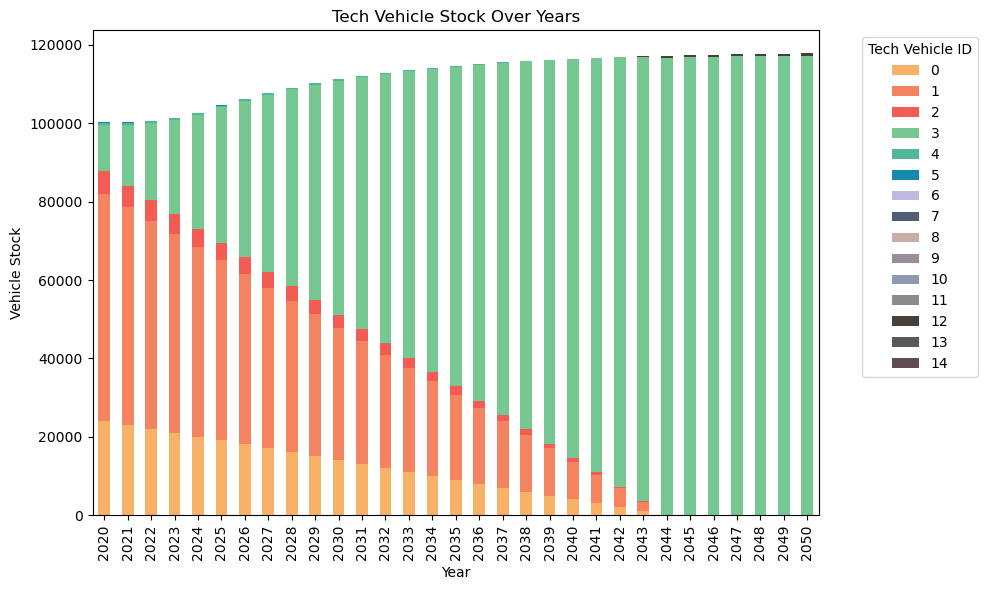

In [636]:
fig, ax = plt.subplots(figsize=(10, 6))

years = range(y_init, Y_end + 1)
tech_ids = list(techvehicle_list.keys())

techveh_stock_all = get_vehicle_stock()

# Prepare data for stacked bar plot
data = {year: [techveh_stock_all.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
df = pd.DataFrame(data, index=tech_ids).T

# Plotting
df.plot(kind='bar', stacked=True, ax=ax, color=colors_techvehicles)
ax.set_xlabel('Year')
ax.set_ylabel('Vehicle Stock')
ax.set_title('Tech Vehicle Stock Over Years')
plt.legend(title='Tech Vehicle ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

First quintile


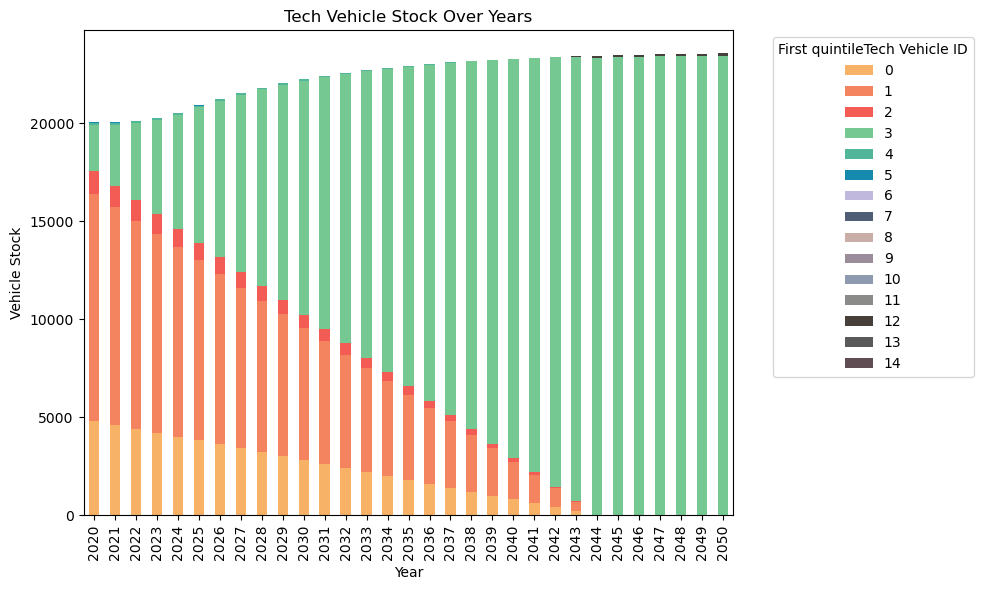

Second quintile


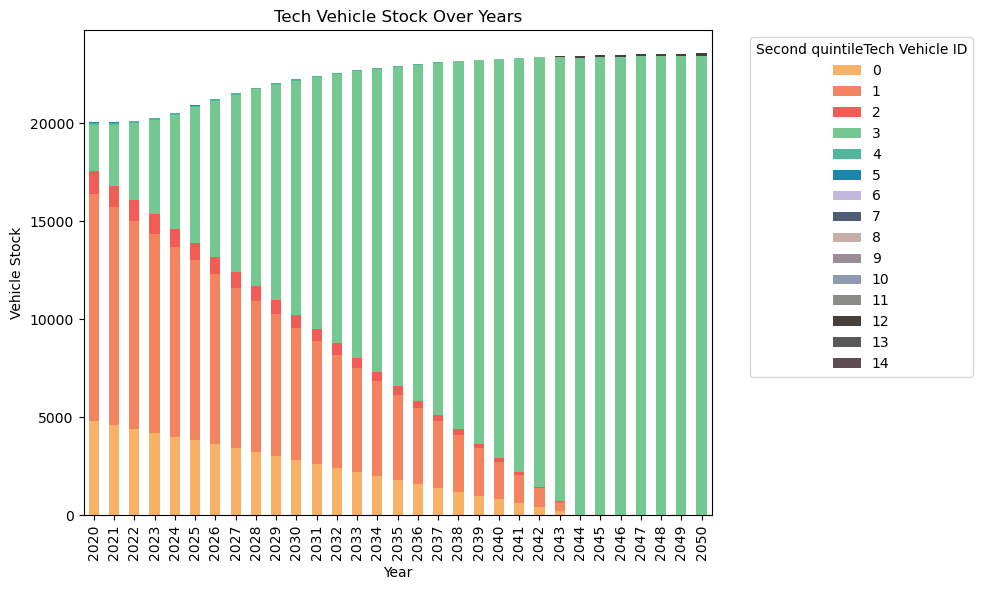

Third quintile


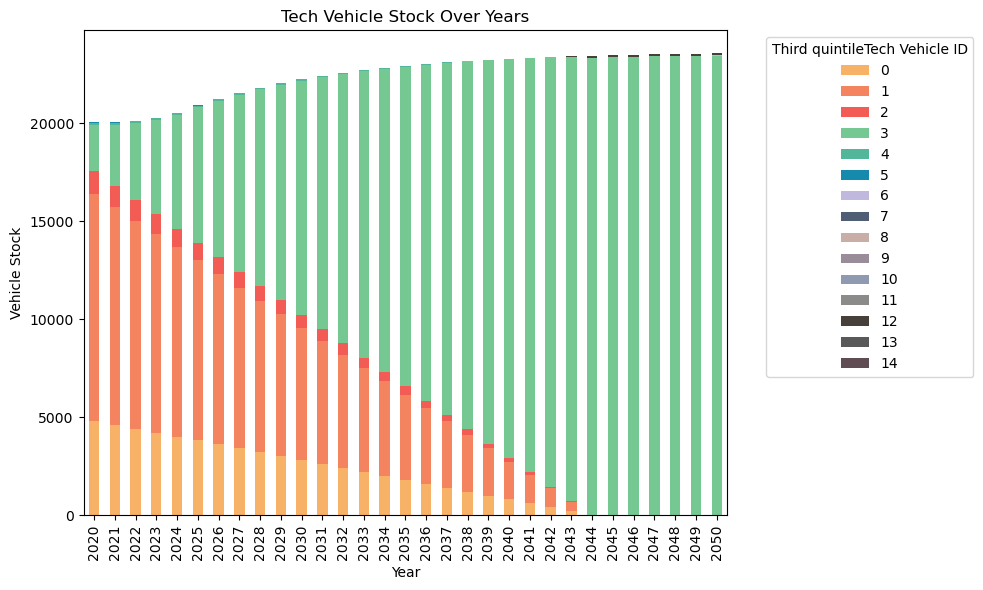

Fourth quintile


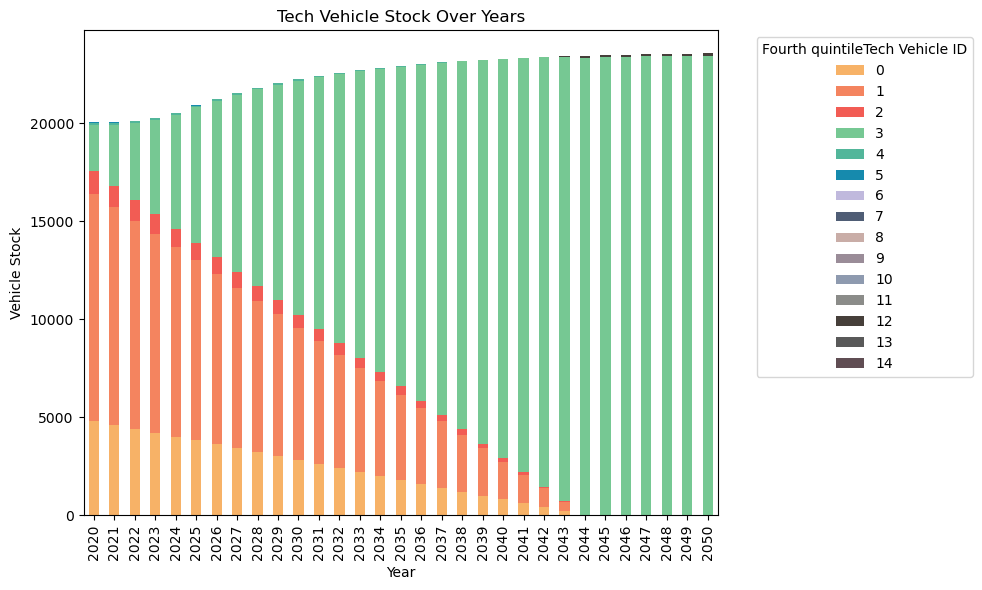

Fifth quintile


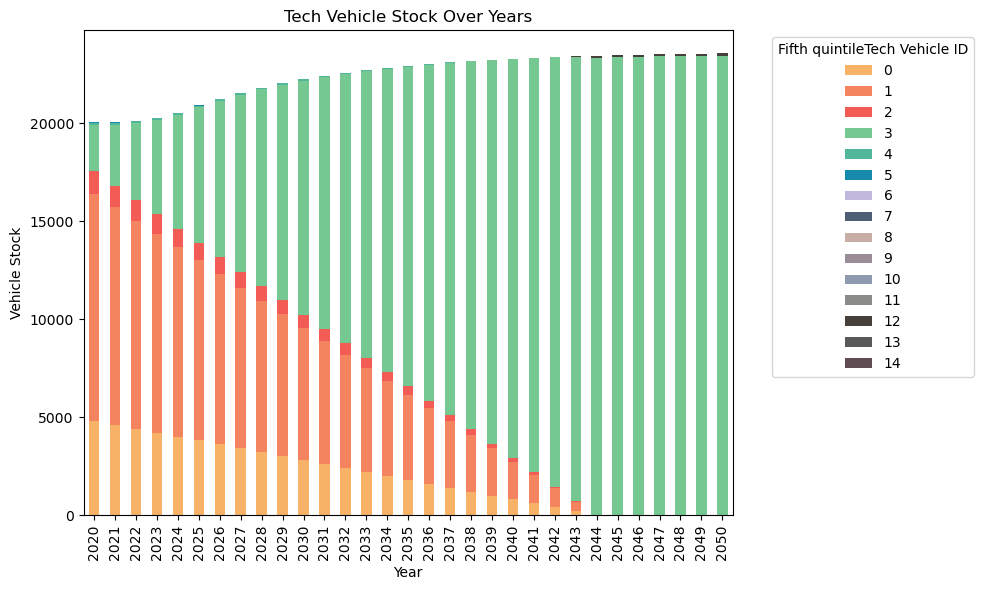

Commercial


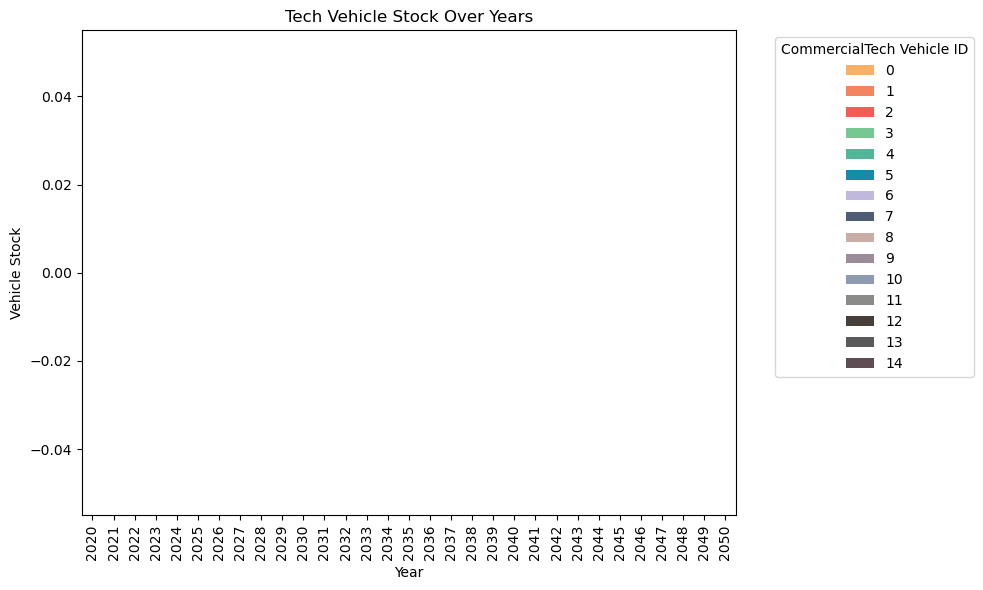

In [637]:
for fs in financial_status_list.keys():
    techveh_stock_fs = get_vehicle_stock(by_income_class=True, income_class=financial_status_list[fs]["name"])
    print(financial_status_list[fs]["name"] )
    fig, ax = plt.subplots(figsize=(10, 6))

    years = range(y_init, Y_end + 1)
    tech_ids = list(techvehicle_list.keys())

    techveh_stock_all = get_vehicle_stock()

    # Prepare data for stacked bar plot
    data = {year: [techveh_stock_fs.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
    df = pd.DataFrame(data, index=tech_ids).T

    # Plotting
    df.plot(kind='bar', stacked=True, ax=ax, color=colors_techvehicles)
    ax.set_xlabel('Year')
    ax.set_ylabel('Vehicle Stock')
    ax.set_title('Tech Vehicle Stock Over Years')
    plt.legend(title= financial_status_list[fs]["name"] + 'Tech Vehicle ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Fueling infrastructure investments

In [638]:
technology_list = input_data["Technology"]
technology_list = {item["id"]: item for item in technology_list}
geographic_element_list = input_data["GeographicElement"]
geographic_element_list = {item["id"]: item for item in geographic_element_list}

def get_fuel_infr_plus():
    q_plus_by_tech = {}

    for t in technology_list.keys():
        for y in range(y_init, Y_end + 1):
            total_expansion_per_y = sum(q_fuel_infr_plus[(y, t, e)] for e in geographic_element_list.keys() if (y, t, e) in q_fuel_infr_plus.keys())
            q_plus_by_tech[(y, t)] = total_expansion_per_y
    return q_plus_by_tech

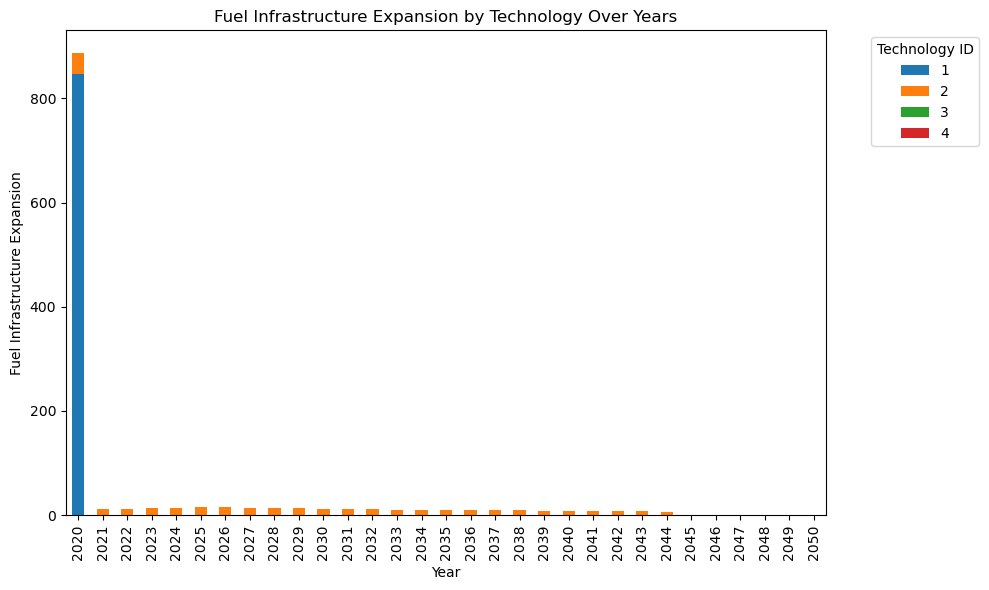

In [639]:
q_plus_by_tech = get_fuel_infr_plus()

fig, ax = plt.subplots(figsize=(10, 6))

years = range(y_init, Y_end + 1)
tech_ids = list(technology_list.keys())

# Prepare data for stacked bar plot
data = {year: [q_plus_by_tech.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
df = pd.DataFrame(data, index=tech_ids).T

# Plotting
df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Fuel Infrastructure Expansion')
ax.set_title('Fuel Infrastructure Expansion by Technology Over Years')
plt.legend(title='Technology ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [640]:
def get_s_per_year_and_tech(tech_id_list = ["diesel", "electricity"]):
    s_per_year_and_tech = {}

    for t in tech_id_list:
        for y in range(y_init, Y_end + 1):
            total_s_per_y = sum(s[(y, (1, r, odpair_list[r]["path_id"], e), tv)] for r in odpair_list.keys() for tv in technology_list.keys() for e in geographic_element_list.keys() if (y, (1, r, odpair_list[r]["path_id"], e), tv) in s.keys() and technology_list[techvehicle_list[tv]["technology"]]["fuel"] in (tech_id_list))
            s_per_year_and_tech[(y, t)] = total_s_per_y
    return s_per_year_and_tech


In [641]:
energy_fueled_diesel = get_s_per_year_and_tech(tech_id_list=["diesel"])
energy_fueled_electricity = get_s_per_year_and_tech(tech_id_list=["electricity"])
print(energy_fueled_diesel)
print(energy_fueled_electricity)

{(2020, 'diesel'): 599.404604, (2021, 'diesel'): 605.120075, (2022, 'diesel'): 608.103755, (2023, 'diesel'): 601.442232, (2024, 'diesel'): 584.74167, (2025, 'diesel'): 555.504585, (2026, 'diesel'): 526.26751, (2027, 'diesel'): 497.030425, (2028, 'diesel'): 467.79334, (2029, 'diesel'): 438.556255, (2030, 'diesel'): 409.31917, (2031, 'diesel'): 380.082085, (2032, 'diesel'): 350.845, (2033, 'diesel'): 321.607925, (2034, 'diesel'): 292.37084, (2035, 'diesel'): 263.13375, (2036, 'diesel'): 233.896665, (2037, 'diesel'): 204.65959, (2038, 'diesel'): 175.4225, (2039, 'diesel'): 146.185415, (2040, 'diesel'): 116.94833, (2041, 'diesel'): 87.71125, (2042, 'diesel'): 58.47417, (2043, 'diesel'): 29.237085, (2044, 'diesel'): 0.0, (2045, 'diesel'): 0.0, (2046, 'diesel'): 0.0, (2047, 'diesel'): 0.0, (2048, 'diesel'): 0.0, (2049, 'diesel'): 0.0, (2050, 'diesel'): 0.0}
{(2020, 'electricity'): 39.915608, (2021, 'electricity'): 51.431924, (2022, 'electricity'): 63.872653, (2023, 'electricity'): 77.336901,

In [642]:
# check total investments per technology
data = {year: [q_plus_by_tech.get((year, tech_id), 0) for tech_id in tech_ids if tech_id == 1] for year in years}
print(data)


{2020: [845.937763], 2021: [0.0], 2022: [0.0], 2023: [0.0], 2024: [0.0], 2025: [0.0], 2026: [0.0], 2027: [0.0], 2028: [0.0], 2029: [0.0], 2030: [0.0], 2031: [0.0], 2032: [0.0], 2033: [0.0], 2034: [0.0], 2035: [0.0], 2036: [0.0], 2037: [0.0], 2038: [0.0], 2039: [0.0], 2040: [0.0], 2041: [0.0], 2042: [0.0], 2043: [0.0], 2044: [0.0], 2045: [0.0], 2046: [0.0], 2047: [0.0], 2048: [0.0], 2049: [0.0], 2050: [0.0]}


In [643]:
# check tech_shift 
def get_f_per_tech(tech_id_list = ["diesel", "electricity"]):
    f_per_tech_and_year = {}
    for t in tech_id_list:
        for y in range(y_init, Y_end + 1):
            total_activity_per_tech = sum(f[(y, (1, r, odpair_list[r]["path_id"]), (1, tv), g)] for r in odpair_list.keys() for tv in techvehicle_list.keys() for g in range(g_init, y + 1) if (y, (1, r, odpair_list[r]["path_id"]), (1, tv), g) in f.keys() and technology_list[techvehicle_list[tv]["technology"]]["fuel"] in tech_id_list)
            f_per_tech_and_year[(y, t)] = total_activity_per_tech
    return f_per_tech_and_year

In [644]:
f_per_tech_diesel = get_f_per_tech(tech_id_list=["diesel"])
f_per_tech_electricity = get_f_per_tech(tech_id_list=["electricity"])
print(f_per_tech_diesel)
print(f_per_tech_electricity)

{(2020, 'diesel'): 58231644.13849, (2021, 'diesel'): 57769186.235803, (2022, 'diesel'): 56812320.507778, (2023, 'diesel'): 55343503.17, (2024, 'diesel'): 53341830.0, (2025, 'diesel'): 50779060.962195, (2026, 'diesel'): 48007647.0, (2027, 'diesel'): 45340555.5, (2028, 'diesel'): 42673464.0, (2029, 'diesel'): 40006372.5, (2030, 'diesel'): 37339281.0, (2031, 'diesel'): 34672189.5, (2032, 'diesel'): 32005098.0, (2033, 'diesel'): 29338006.5, (2034, 'diesel'): 26670915.0, (2035, 'diesel'): 24003823.5, (2036, 'diesel'): 21336732.0, (2037, 'diesel'): 18669640.5, (2038, 'diesel'): 16002549.0, (2039, 'diesel'): 13335457.5, (2040, 'diesel'): 10668366.0, (2041, 'diesel'): 8001274.5, (2042, 'diesel'): 5334183.0, (2043, 'diesel'): 2734728.39575, (2044, 'diesel'): 392046.095675, (2045, 'diesel'): 392046.095675, (2046, 'diesel'): 392046.095675, (2047, 'diesel'): 392046.095675, (2048, 'diesel'): 392046.095675, (2049, 'diesel'): 392046.095675, (2050, 'diesel'): 392046.095675}
{(2020, 'electricity'): 912

In [645]:
def get_f_by_mode(mode_list=[1, 2]):
    f_per_mode = {}
    for m in mode_list:
        for y in range(y_init, Y_end + 1):
            total_activity_per_tech = sum(f[(y, (1, r, odpair_list[r]["path_id"]), (m, tv), g)] for r in odpair_list.keys() for tv in range(1, max(techvehicle_list.keys()) + 2) for g in range(g_init, y + 1) if (y, (1, r, odpair_list[r]["path_id"]), (m, tv), g) in f.keys())
            f_per_mode[(y, m)] = total_activity_per_tech
    return f_per_mode

In [646]:
f_per_mode_1 = get_f_by_mode(mode_list=[1])
f_per_mode_2 = get_f_by_mode(mode_list=[2])
print(f_per_mode_1)
print(f_per_mode_2)


{(2020, 1): 49762452.0, (2021, 1): 52705784.180004, (2022, 1): 55422144.570002, (2023, 1): 57927418.889999, (2024, 1): 60238311.109999, (2025, 1): 62267361.247804, (2026, 1): 64344071.149999, (2027, 1): 66171336.739998996, (2028, 1): 67868444.929999, (2029, 1): 69449324.36999899, (2030, 1): 70926800.059999, (2031, 1): 72312576.809999, (2032, 1): 73617258.799999, (2033, 1): 74850394.50999899, (2034, 1): 76020537.809999, (2035, 1): 77135318.309999, (2036, 1): 78201515.939999, (2037, 1): 79225137.149999, (2038, 1): 80211488.659999, (2039, 1): 81165248.109999, (2040, 1): 82090530.659999, (2041, 1): 82990950.459999, (2042, 1): 83869677.169999, (2043, 1): 84729486.919999, (2044, 1): 85572808.569999, (2045, 1): 85668881.769999, (2046, 1): 85752444.319999, (2047, 1): 85825114.729999, (2048, 1): 85888304.659999, (2049, 1): 85943244.749999, (2050, 1): 85991007.499999}
{(2020, 2): 0, (2021, 2): 0, (2022, 2): 0, (2023, 2): 0, (2024, 2): 0, (2025, 2): 0, (2026, 2): 0, (2027, 2): 0, (2028, 2): 0, (2

In [647]:
f_per_tech = get_f_per_tech()
print(f_per_tech)
print(fuel_list)
print(od_pair_list_by_year)
print(technology_list.keys())
for y in range(y_init, Y_end + 1):
    val1 = sum(f_per_tech[(y, fuel_list[f]["name"])] for f in fuel_list.keys())
    val2 = od_pair_list_by_year[y]
    print(f"Year: {y}", val1, val2, val1 - val2, val1 >= val2)




{(2020, 'diesel'): 67351656.0, (2021, 'diesel'): 69562104.680004, (2022, 'diesel'): 71545581.570002, (2023, 'diesel'): 73317972.389999, (2024, 'diesel'): 74895981.109999, (2025, 'diesel'): 76296470.209999, (2026, 'diesel'): 77535974.149999, (2027, 'diesel'): 78630356.239999, (2028, 'diesel'): 79594580.929999, (2029, 'diesel'): 80442576.86999899, (2030, 'diesel'): 81187169.059999, (2031, 'diesel'): 81840062.309999, (2032, 'diesel'): 82411860.799999, (2033, 'diesel'): 82912113.00999899, (2034, 'diesel'): 83349372.809999, (2035, 'diesel'): 83731269.809999, (2036, 'diesel'): 84064583.939999, (2037, 'diesel'): 84355321.649999, (2038, 'diesel'): 84608789.659999, (2039, 'diesel'): 84829665.609999, (2040, 'diesel'): 85022064.659999, (2041, 'diesel'): 85189600.959999, (2042, 'diesel'): 85335444.169999, (2043, 'diesel'): 85462370.419999, (2044, 'diesel'): 85572808.569999, (2045, 'diesel'): 85668881.769999, (2046, 'diesel'): 85752444.319999, (2047, 'diesel'): 85825114.729999, (2048, 'diesel'): 85

In [648]:
mode_list = input_data["Mode"]
mode_list = {item["id"]: item for item in mode_list}
product_list = input_data["Product"]
product_list = {item["id"]: item for item in product_list}
vehicle_type_list = input_data["Vehicletype"]
vehicle_type_list = {item["name"]: item for item in vehicle_type_list}
path_list = input_data["Path"]
path_list = {item["id"]: item for item in path_list}

for y in range(y_init, 2022):
    for r in range(1, 4):
        val1 = sum(f[(y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g)] for mode_id in [1, 2] for p in product_list.keys() for r in odpair_list.keys() for tv in range(0, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys())
        val2 = odpair_list[r]["F"][y - y_init]
        print(f"Year: {y}, Odpair: {r}", val1, val2, val1 - val2)


Year: 2020, Odpair: 1 67351656.0 5566310.0 61785346.0
Year: 2020, Odpair: 2 67351656.0 5566310.0 61785346.0
Year: 2020, Odpair: 3 67351656.0 5566310.0 61785346.0
Year: 2021, Odpair: 1 69562104.680004 5748993.6 63813111.080004
Year: 2021, Odpair: 2 69562104.680004 5748993.6 63813111.080004
Year: 2021, Odpair: 3 69562104.680004 5748993.6 63813111.080004


## Mode shift

- by trip
- by pkm

In [649]:
mode_list = input_data["Mode"]
mode_list = {item["id"]: item for item in mode_list}
product_list = input_data["Product"]
product_list = {item["id"]: item for item in product_list}
vehicle_type_list = input_data["Vehicletype"]
vehicle_type_list = {item["name"]: item for item in vehicle_type_list}
path_list = input_data["Path"]
path_list = {item["id"]: item for item in path_list}
print(path_list)
activity_per_mode =  {}
activity_per_mode_pkm = {}
for mode in mode_list.keys():
    mode_id = mode_list[mode]["id"]
    mode_name = mode_list[mode]["name"]

    for y in range(y_init, Y_end):
        total_activity_per_mode = sum(f[(y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g)] for p in product_list.keys() for r in odpair_list.keys() for tv in techvehicle_list.keys() for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys())
        total_activity_per_mode_pkm = sum(f[(y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g)] * path_list[odpair_list[r]["path_id"]]["length"] for p in product_list.keys() for r in odpair_list.keys() for tv in techvehicle_list.keys() for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys())
        total_pkm = sum(path_list[odpair_list[r]["path_id"]]["length"] for p in product_list.keys() for r in odpair_list.keys() for tv in techvehicle_list.keys() for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys())
        activity_per_mode[(y, mode_id)] = total_activity_per_mode
        activity_per_mode_pkm[(y, mode_id)] = total_activity_per_mode_pkm
        print("Year:", y, "Mode:", mode_name, "Activity:", total_activity_per_mode, "Activity pkm:", total_activity_per_mode_pkm, total_pkm)



{0: {'id': 0, 'length': 28.0, 'name': '0', 'sequence': [12]}, 1: {'id': 1, 'length': 32.0, 'name': '1', 'sequence': [12]}, 2: {'id': 2, 'length': 36.0, 'name': '2', 'sequence': [12]}, 3: {'id': 3, 'length': 92.0, 'name': '3', 'sequence': [12]}, 4: {'id': 4, 'length': 32.0, 'name': '4', 'sequence': [12]}, 5: {'id': 5, 'length': 48.0, 'name': '5', 'sequence': [12]}, 6: {'id': 6, 'length': 396.0, 'name': '6', 'sequence': [13, 7, 12]}, 7: {'id': 7, 'length': 28.0, 'name': '7', 'sequence': [13]}, 8: {'id': 8, 'length': 32.0, 'name': '8', 'sequence': [13]}, 9: {'id': 9, 'length': 36.0, 'name': '9', 'sequence': [13]}, 10: {'id': 10, 'length': 92.0, 'name': '10', 'sequence': [13]}, 11: {'id': 11, 'length': 32.0, 'name': '11', 'sequence': [13]}, 12: {'id': 12, 'length': 48.0, 'name': '12', 'sequence': [13]}, 13: {'id': 13, 'length': 396.0, 'name': '13', 'sequence': [12, 7, 13]}, 14: {'id': 14, 'length': 388.0, 'name': '14', 'sequence': [14, 4, 13]}, 15: {'id': 15, 'length': 252.0, 'name': '15',

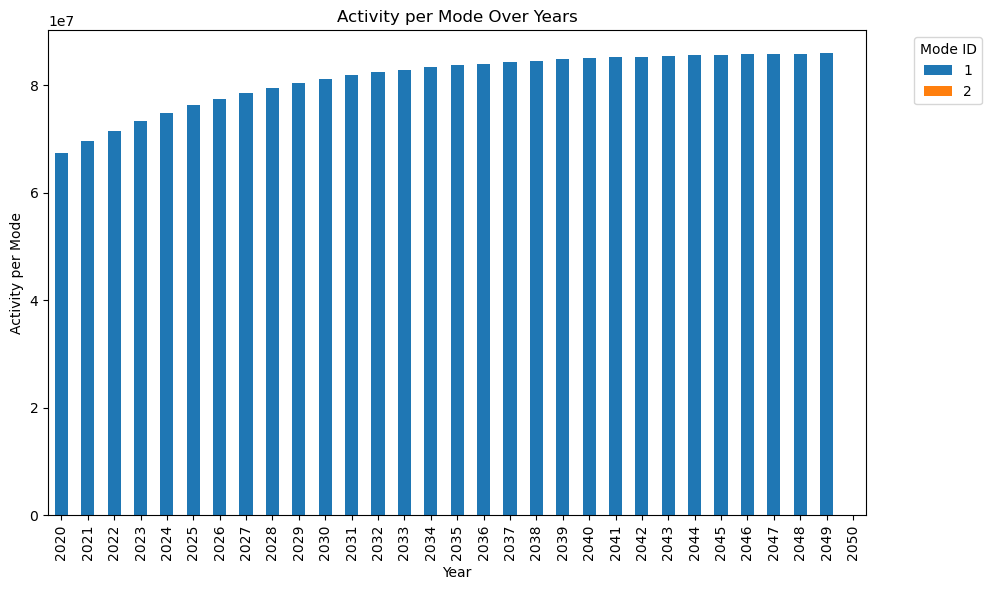

In [650]:

fig, ax = plt.subplots(figsize=(10, 6))

years = range(y_init, Y_end + 1)
mode_ids = list(set(mode_id for _, mode_id in activity_per_mode.keys()))

# Prepare data for stacked bar plot
data = {year: [activity_per_mode.get((year, mode_id), 0) for mode_id in mode_ids] for year in years}
df = pd.DataFrame(data, index=mode_ids).T

# Plotting
df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Activity per Mode')
ax.set_title('Activity per Mode Over Years')
plt.legend(title='Mode ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



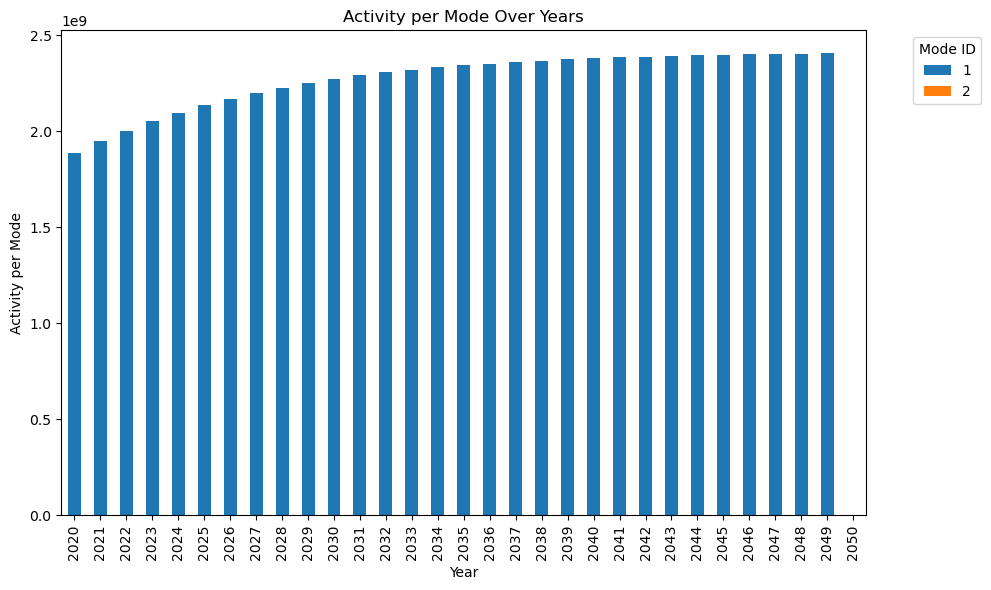

In [651]:

fig, ax = plt.subplots(figsize=(10, 6))

years = range(y_init, Y_end + 1)
mode_ids = list(set(mode_id for _, mode_id in activity_per_mode_pkm.keys()))

# Prepare data for stacked bar plot
data = {year: [activity_per_mode_pkm.get((year, mode_id), 0) for mode_id in mode_ids] for year in years}
df = pd.DataFrame(data, index=mode_ids).T

# Plotting
df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Activity per Mode')
ax.set_title('Activity per Mode Over Years')
plt.legend(title='Mode ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()